<a href="https://colab.research.google.com/github/Jurk06/Data-Recognizer/blob/master/handWrittenDigitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.12.0-rc2


In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

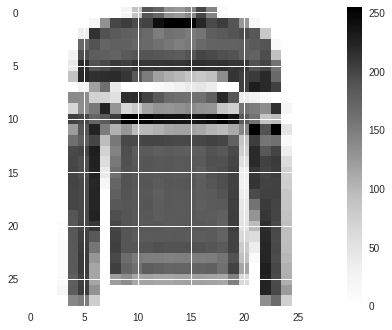

In [16]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.show()

In [0]:
X_train=X_train/255.0
y_train=y_train/255.0

TypeError: ignored

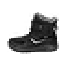

In [18]:
plt.figure()
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
train_labels.shape

(60000,)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
len(train_labels)

60000

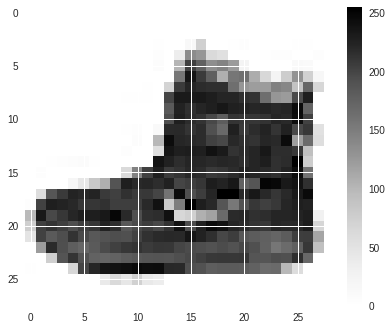

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

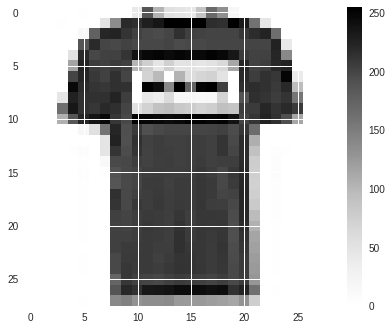

In [25]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

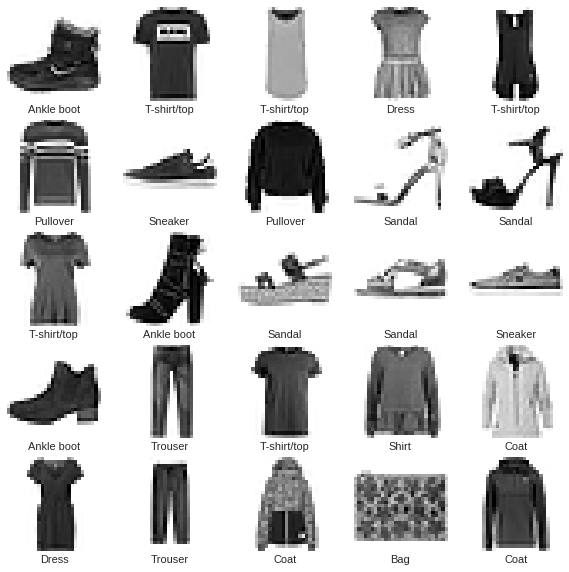

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

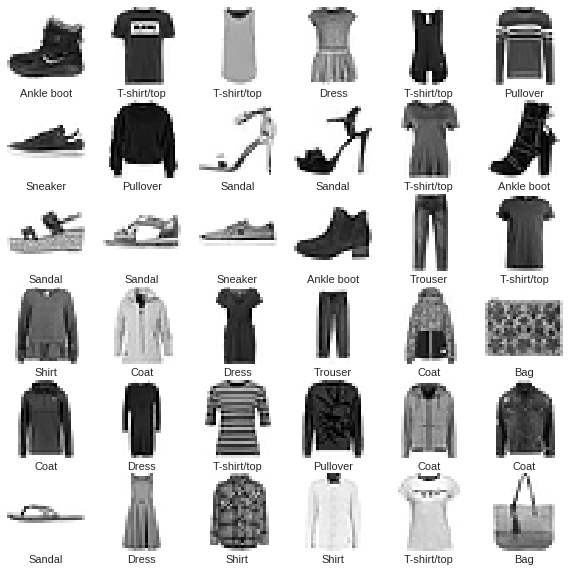

In [30]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [37]:
history=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 1.0631 - acc: 0.6685
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.6346 - acc: 0.7710
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.5594 - acc: 0.8005
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.5178 - acc: 0.8165
Epoch 5/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.4910 - acc: 0.8271


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

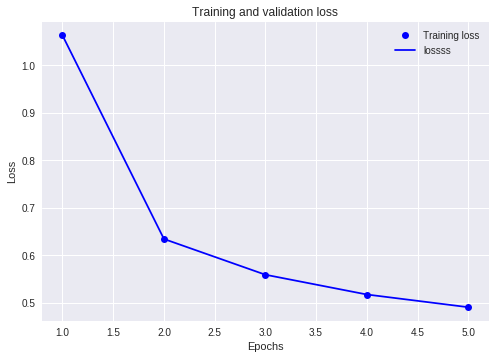

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, loss, 'b', label='lossss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

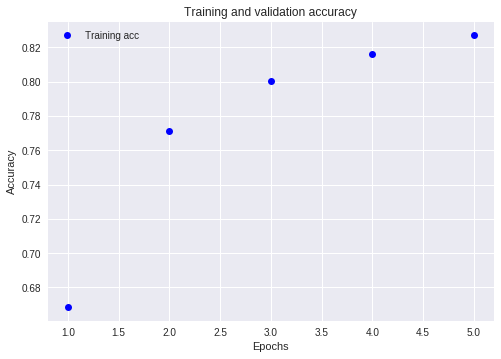

In [45]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
test_loss, test_acc=model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


In [48]:
print("test accuracy", test_acc)

test accuracy 0.818


In [0]:
prediction=model.predict(test_images)




In [52]:
prediction[0]

array([1.6302439e-06, 2.0747217e-08, 8.2373290e-06, 8.6803293e-06,
       1.8649040e-05, 2.2595342e-01, 4.0467057e-05, 2.7190655e-01,
       8.4364247e-03, 4.9362600e-01], dtype=float32)

In [55]:
np.argmax(prediction[0])

9

In [0]:
import numpy as np

In [56]:
test_labels[0]

9

In [57]:
prediction[1]

array([6.25427288e-04, 1.24480275e-05, 8.37623715e-01, 5.50587283e-05,
       1.79310758e-02, 3.64105857e-09, 1.43590137e-01, 9.81135136e-14,
       1.62115772e-04, 4.12003043e-10], dtype=float32)

In [58]:
np.argmax(prediction[1])

2

In [59]:
test_labels[1]

2

In [0]:
def plot_image(i, predicting_array, true_labels, img):
  predicting_array, true_labels, img=predicting_array[i] ,true_labels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_labels=np.argmax(predicting_array)
  if predicted_labels== true_labels:
    color='blue'
  else:
    color='red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_labels],
                                100*np.max(predicting_array),
                                class_names[true_labels]),
                                color=color)

In [0]:
def plot_value_array(i, predicting_array, true_labels):
  predicting_array, true_labels=predicting_array[i] ,true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predicting_array, color='#777777')
  plt.ylim([0,1])
  predicted_labels=np.argmax(predicting_array)
  thisplot[predicted_labels].set_color('red')
  thisplot[true_labels].set_color('blue')

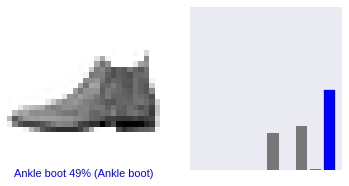

In [77]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)

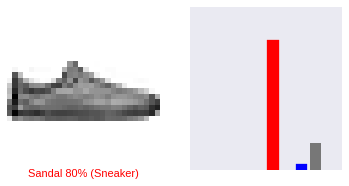

In [78]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction,  test_labels)

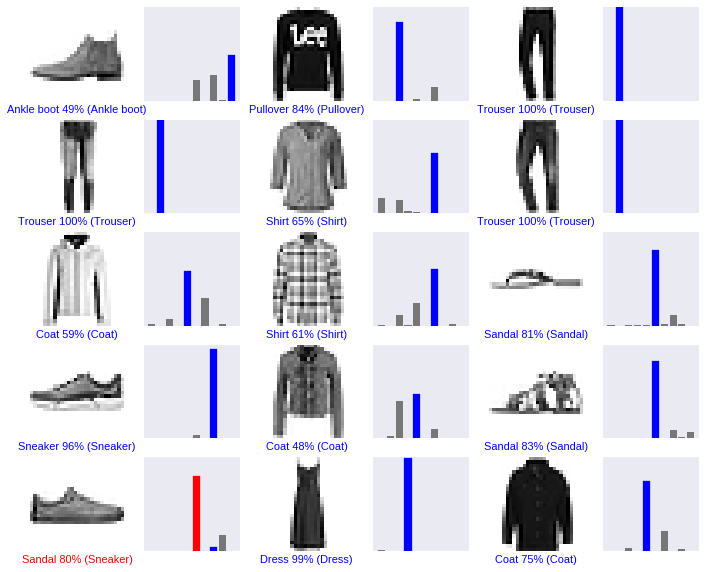

In [79]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)

In [80]:
img=test_images[0]
print(img.shape)

(28, 28)


In [81]:
img=(np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [0]:
predicted_image=model.predict(img)

In [84]:
print(predicted_image)

[[1.6302441e-06 2.0747180e-08 8.2373372e-06 8.6803229e-06 1.8649025e-05
  2.2595349e-01 4.0467021e-05 2.7190635e-01 8.4364219e-03 4.9362606e-01]]


In [87]:
np.argmax(predicted_image[0])

9

In [86]:
predicted_image[0]

array([1.6302441e-06, 2.0747180e-08, 8.2373372e-06, 8.6803229e-06,
       1.8649025e-05, 2.2595349e-01, 4.0467021e-05, 2.7190635e-01,
       8.4364219e-03, 4.9362606e-01], dtype=float32)

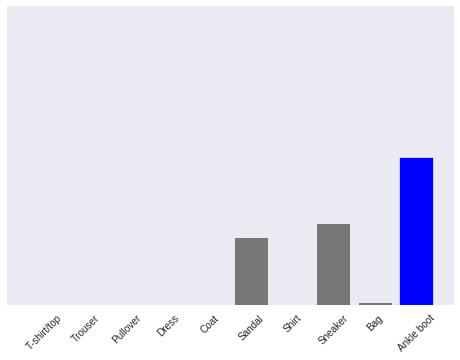

In [91]:
plot_value_array(0, predicted_image,test_labels)
_=plt.xticks(range(10), class_names, rotation=45)

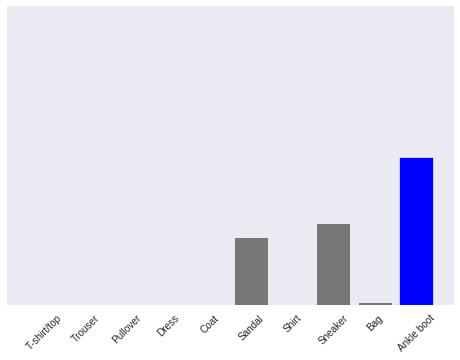

In [90]:
plot_value_array(0, predicted_image, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)